In [1]:
# Import Libraries and Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


# Read in data 

flights_df= pd.read_csv("US Airline Flight Routes and Fares 1993-2024.csv",low_memory=False)


In [2]:
#flights_df.head(20)

In [3]:
grouped_df = flights_df.groupby(['Year', 'quarter','city2'])['passengers'].sum().reset_index()

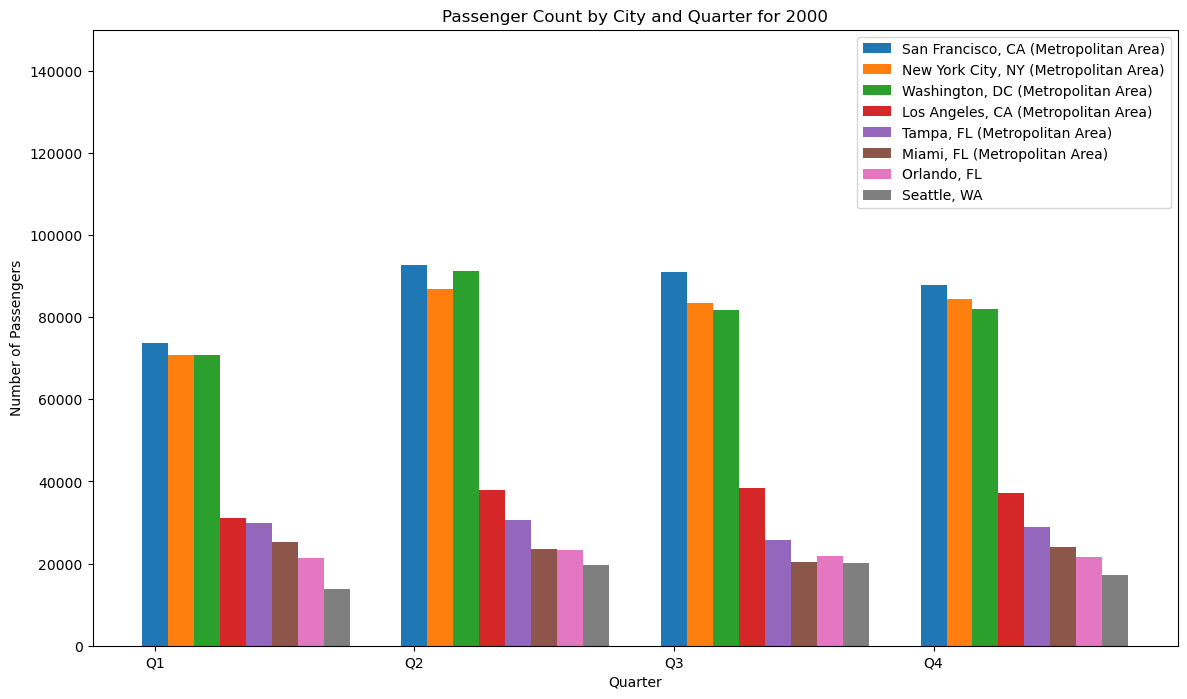

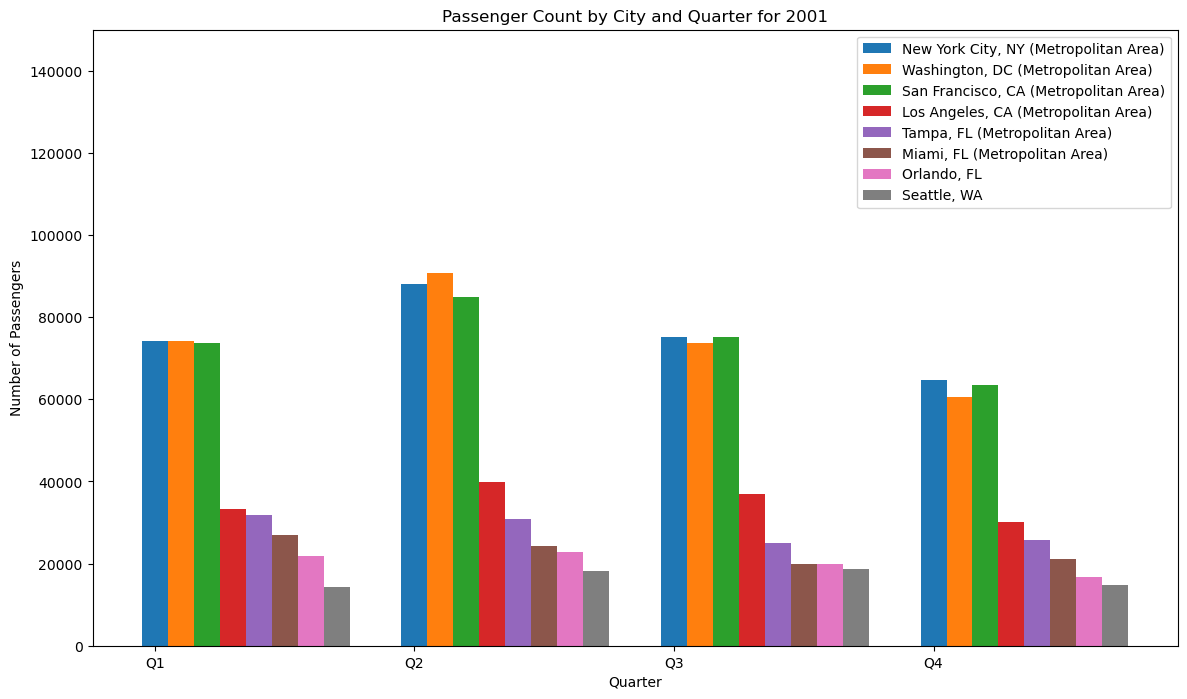

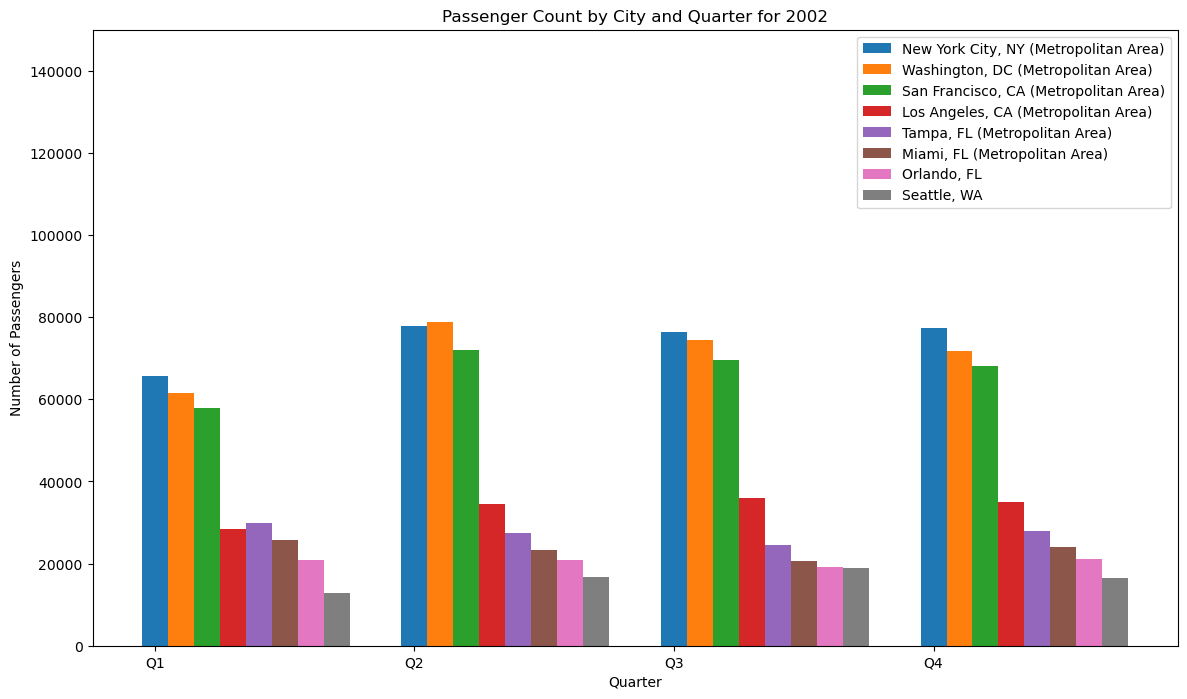

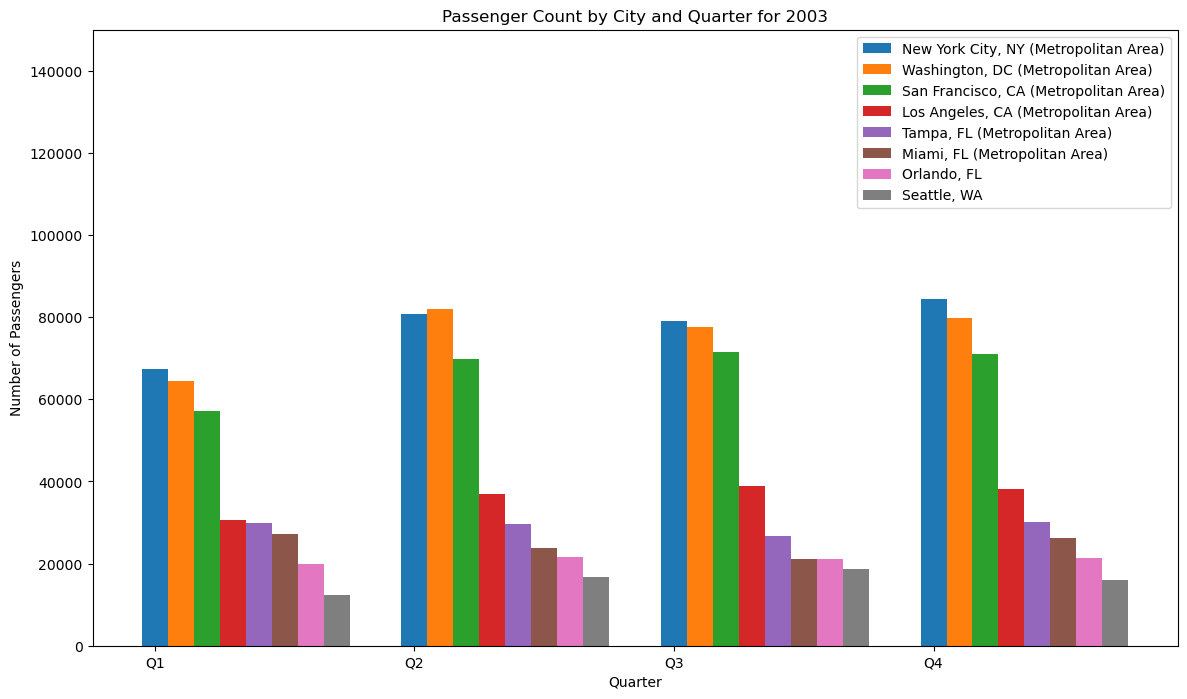

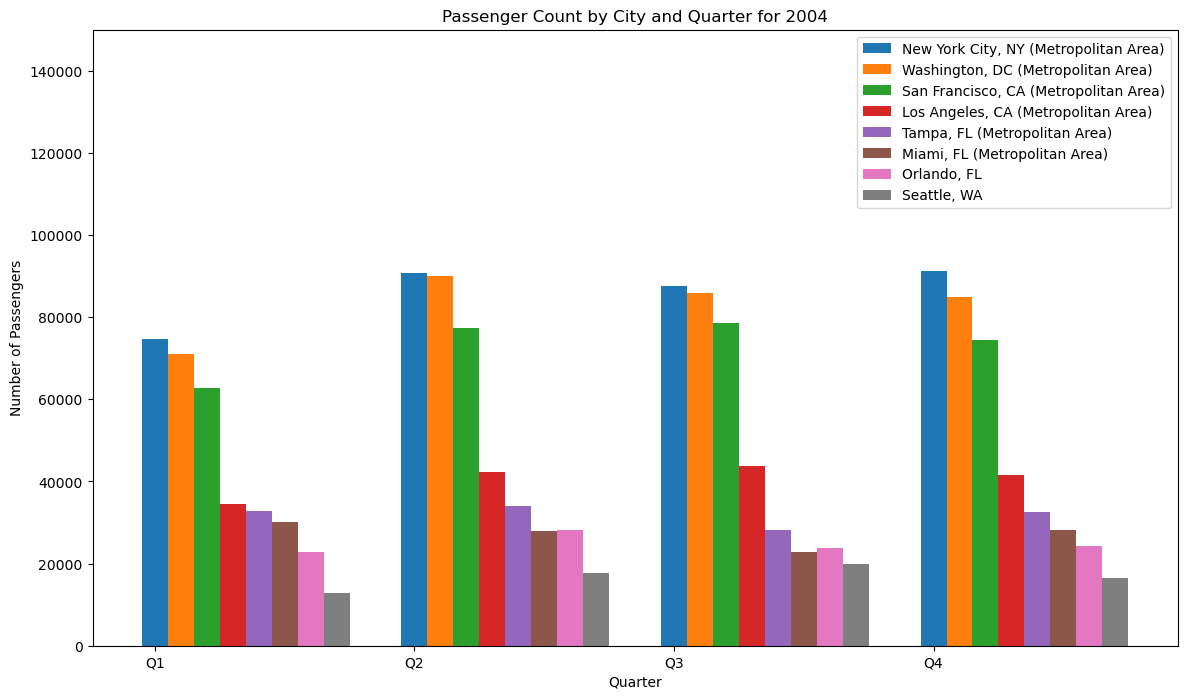

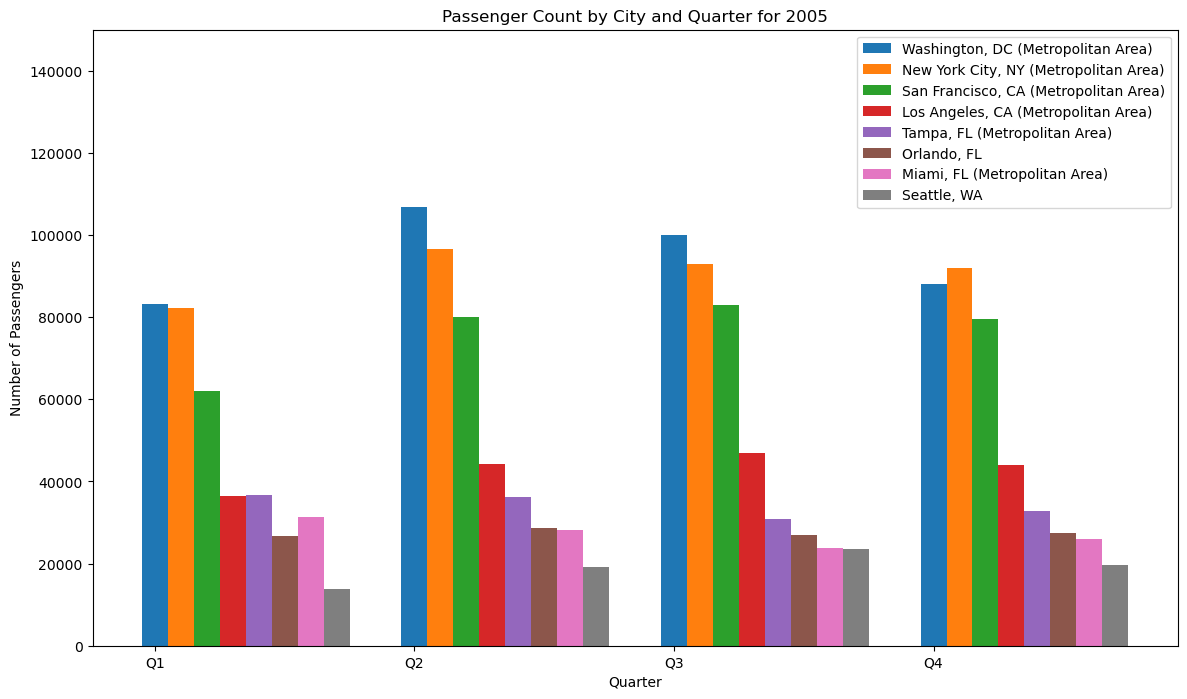

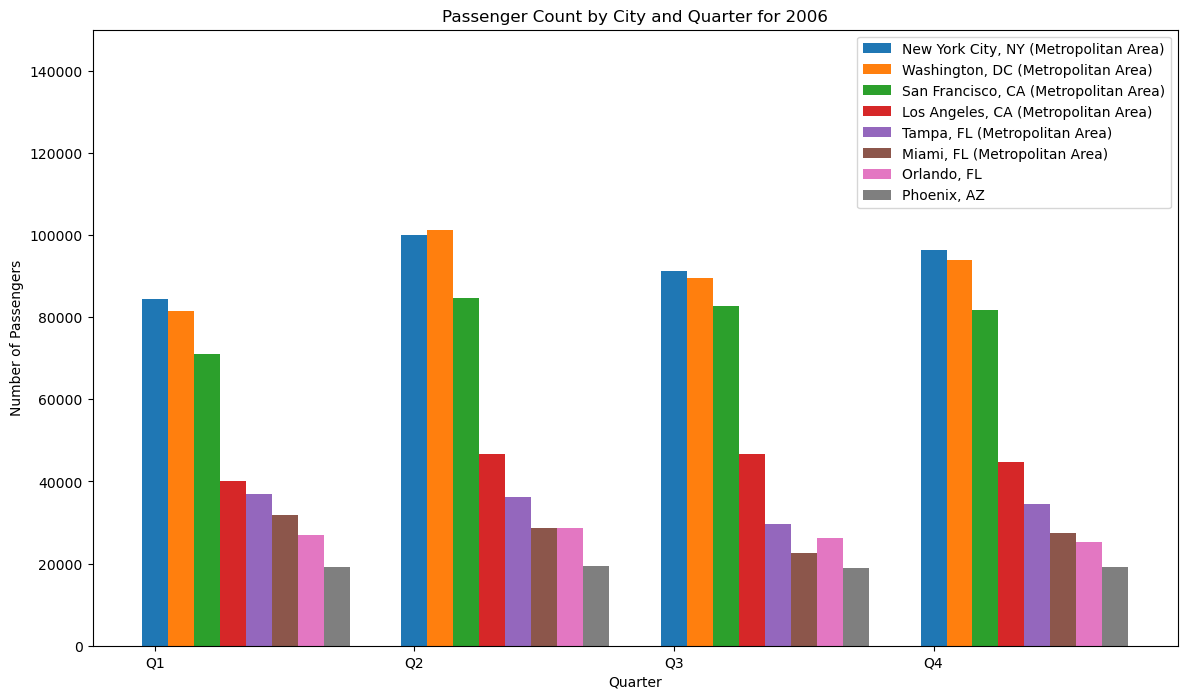

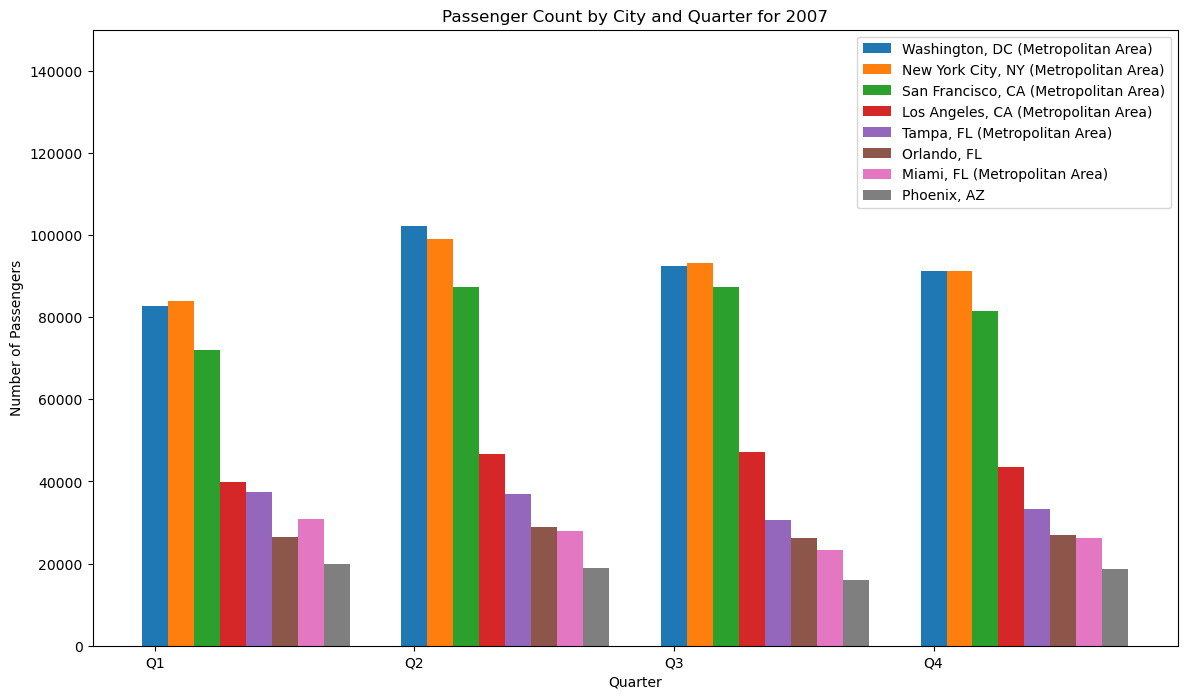

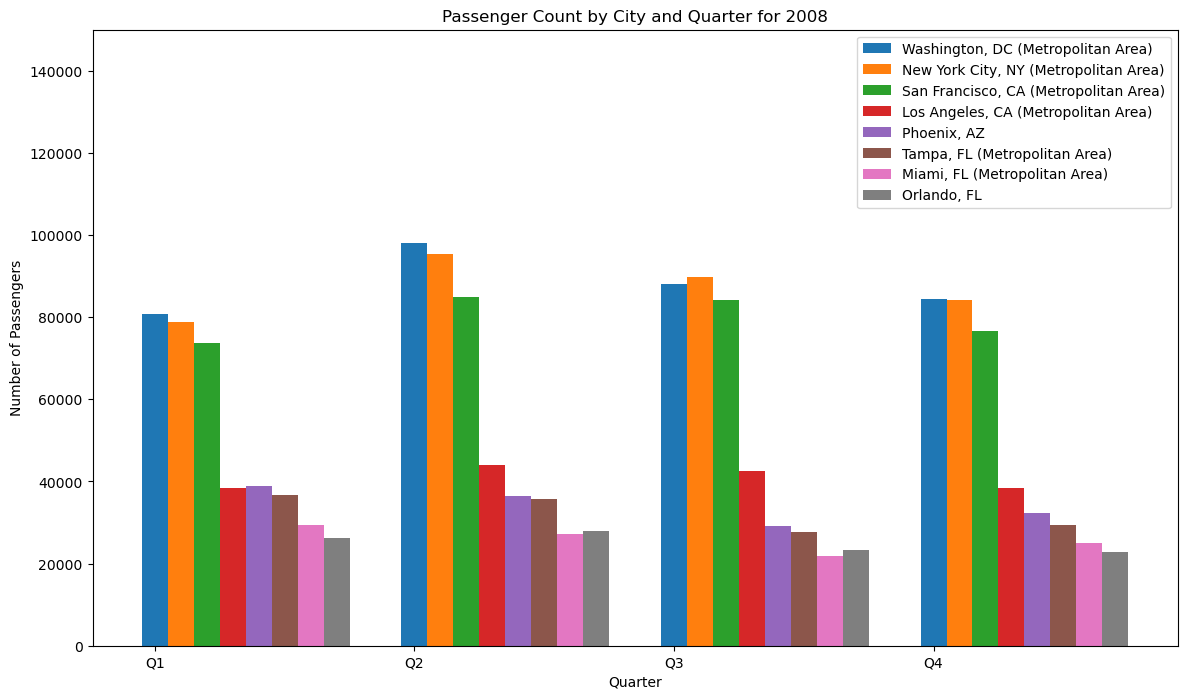

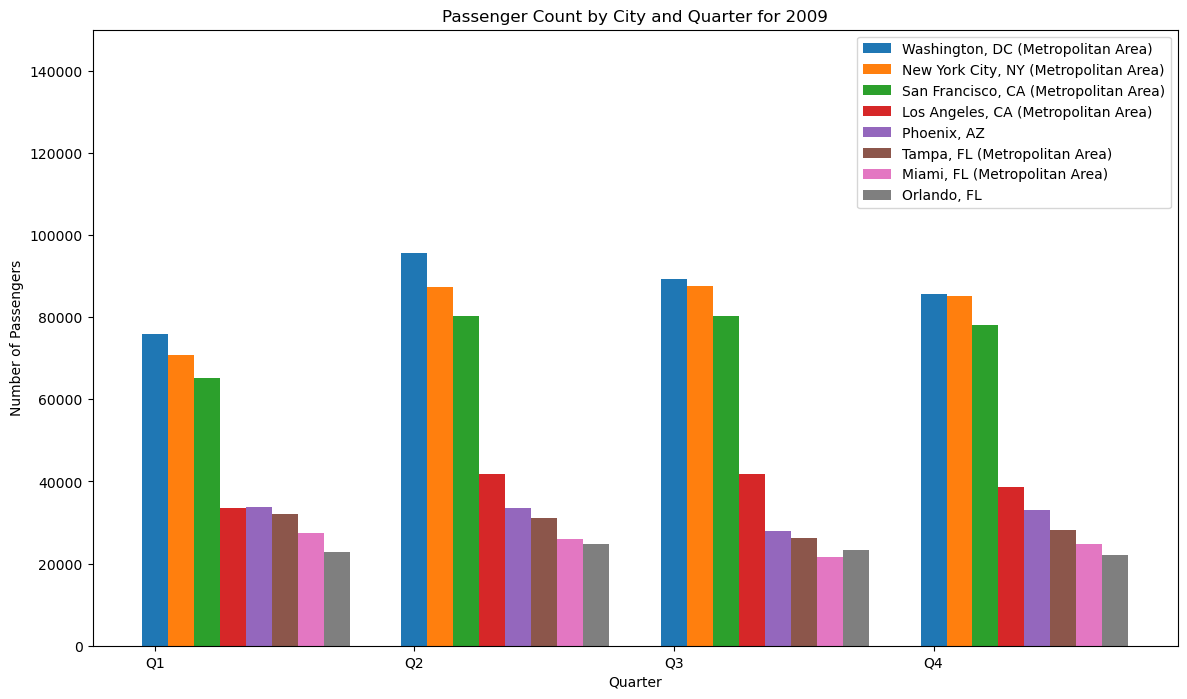

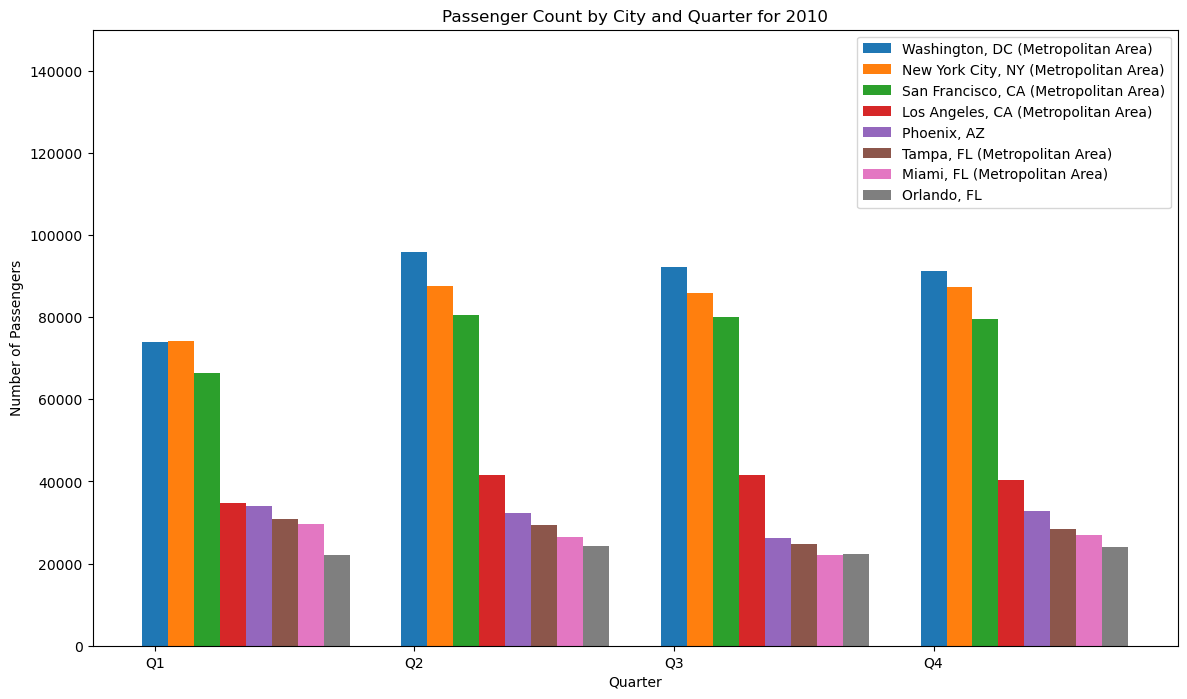

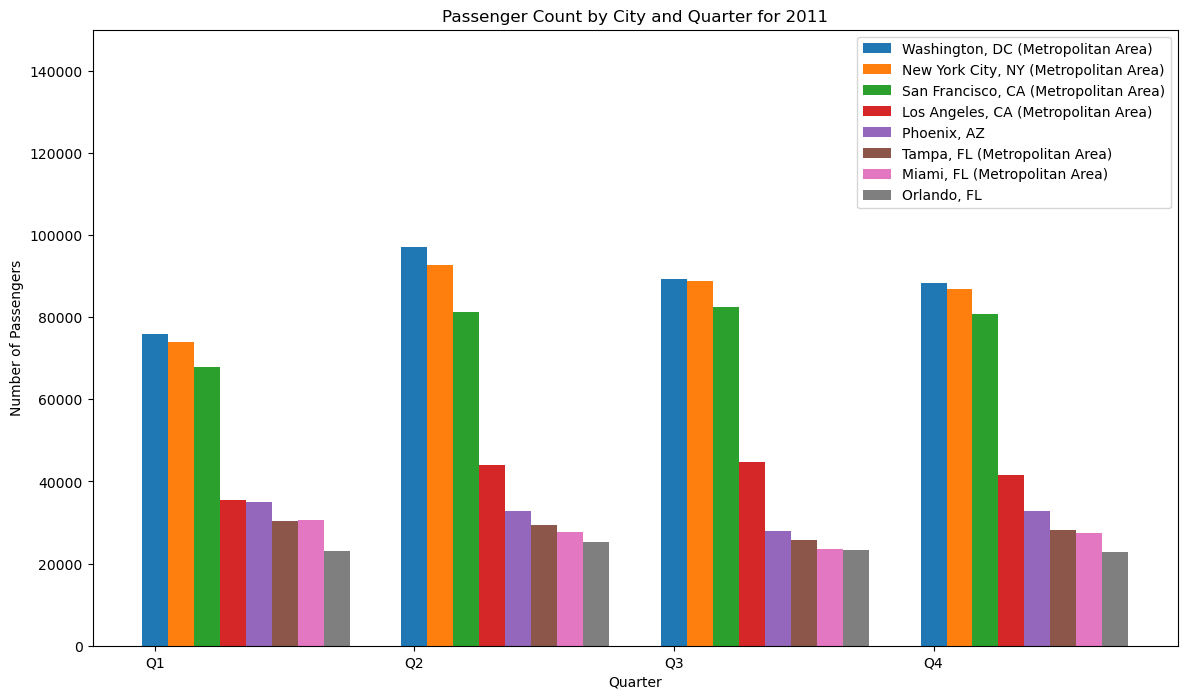

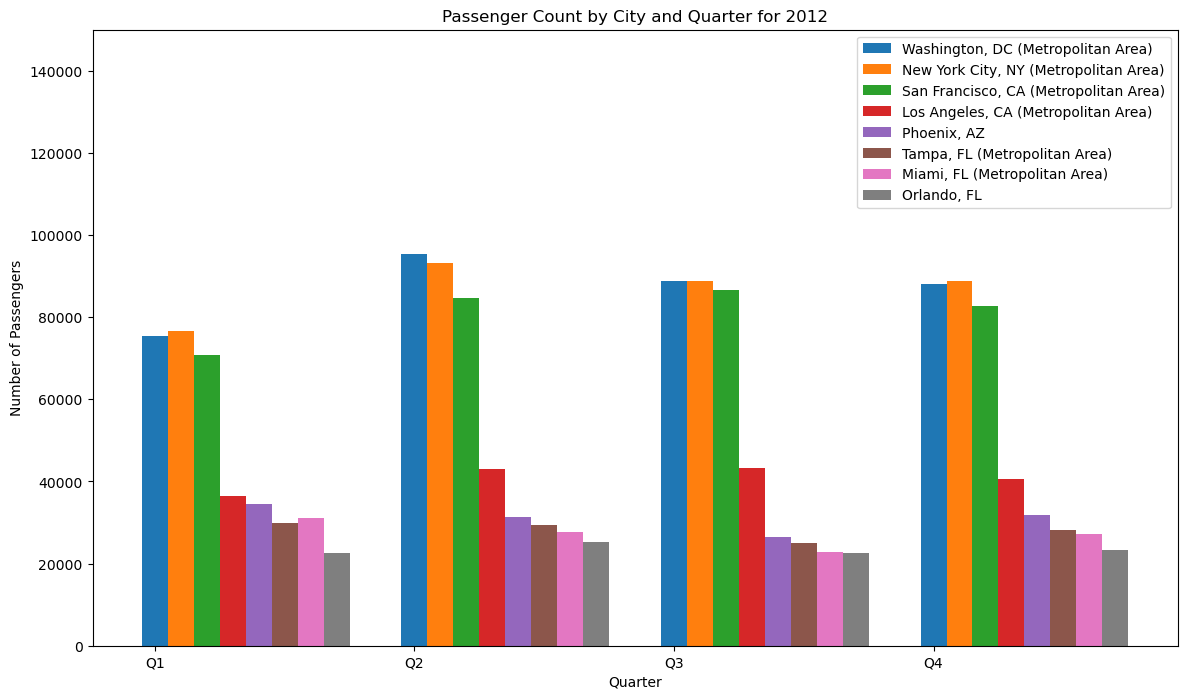

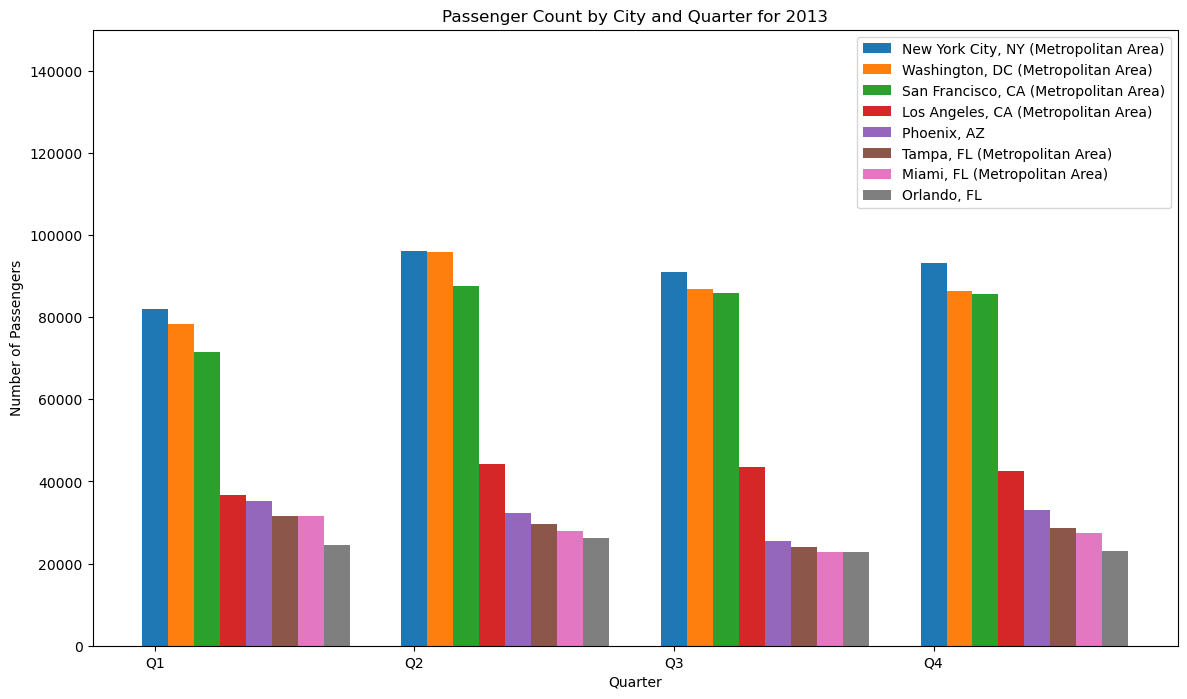

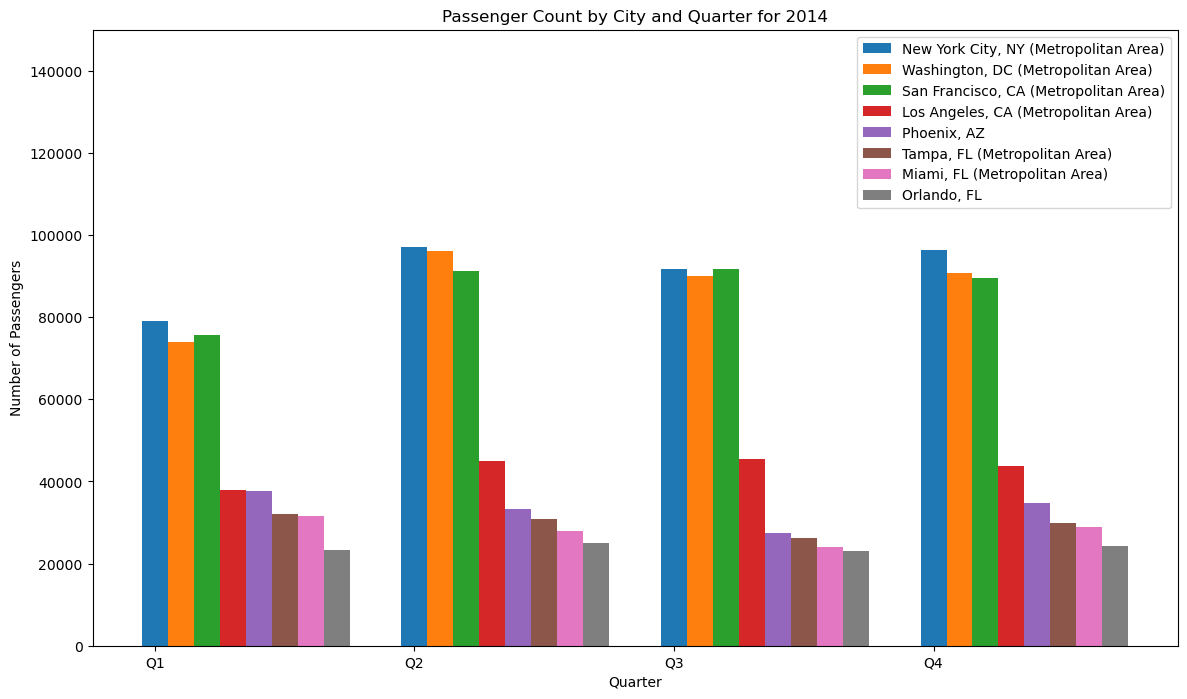

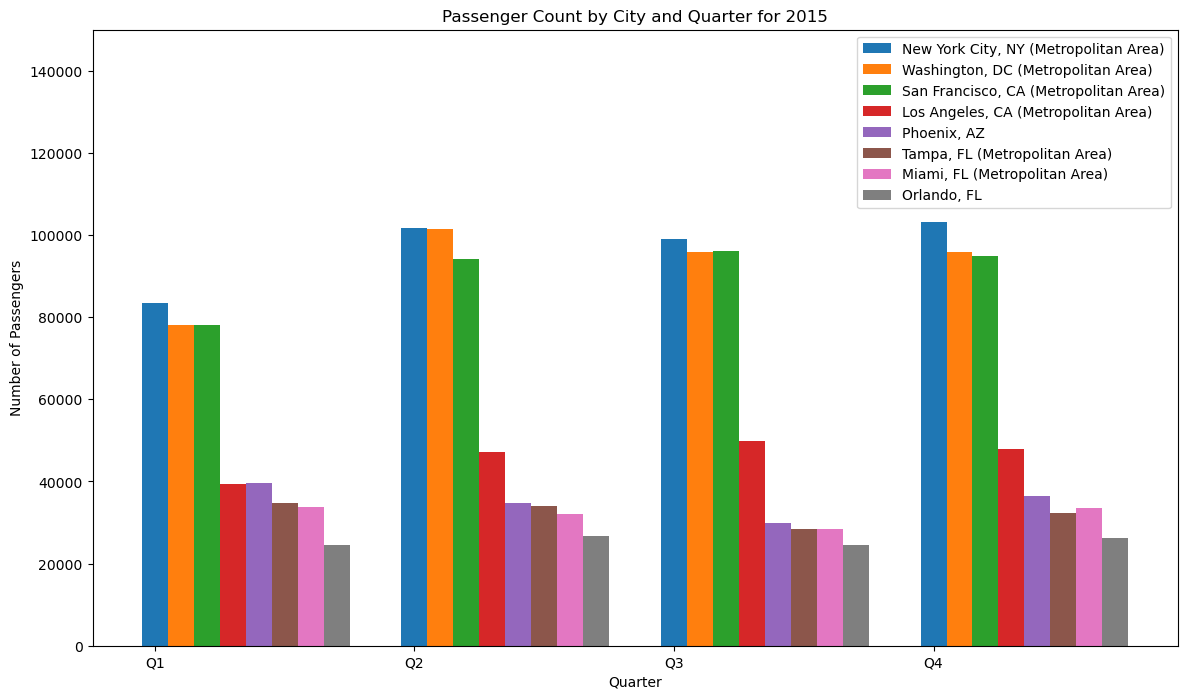

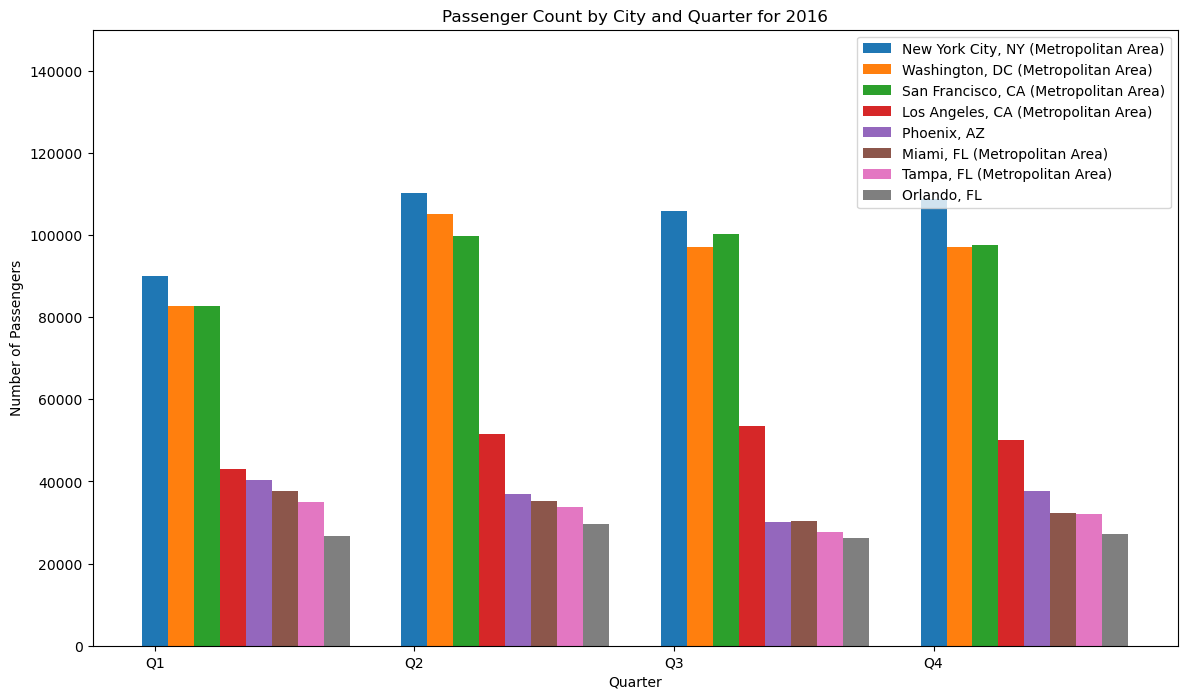

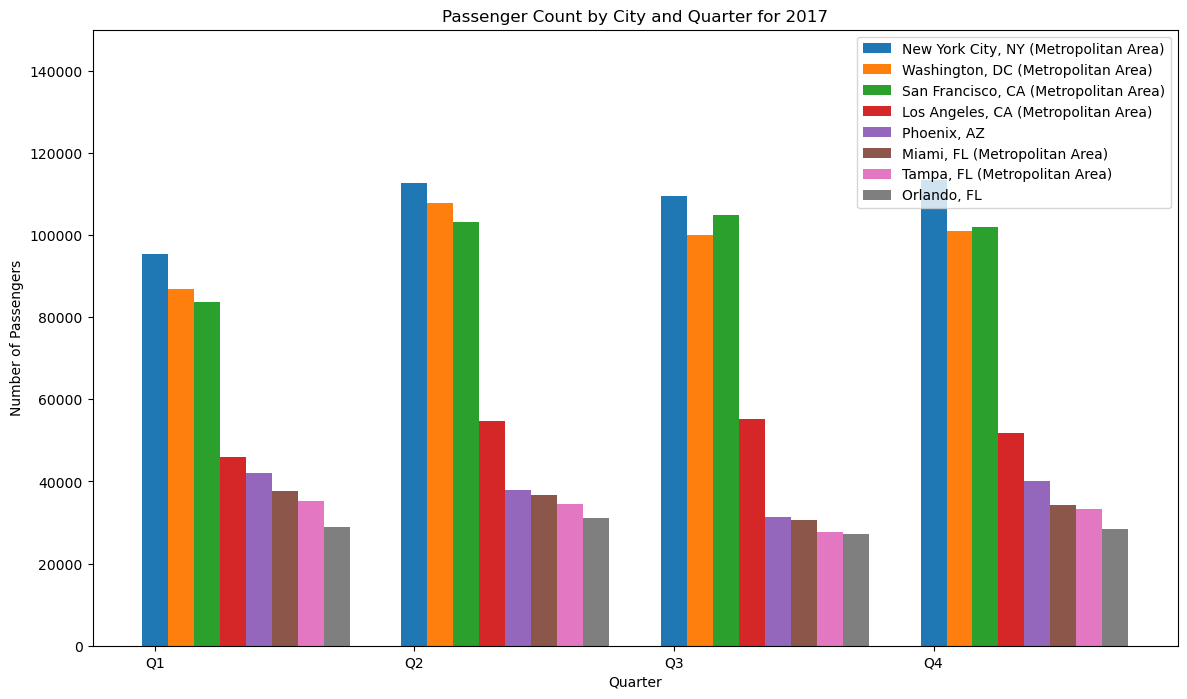

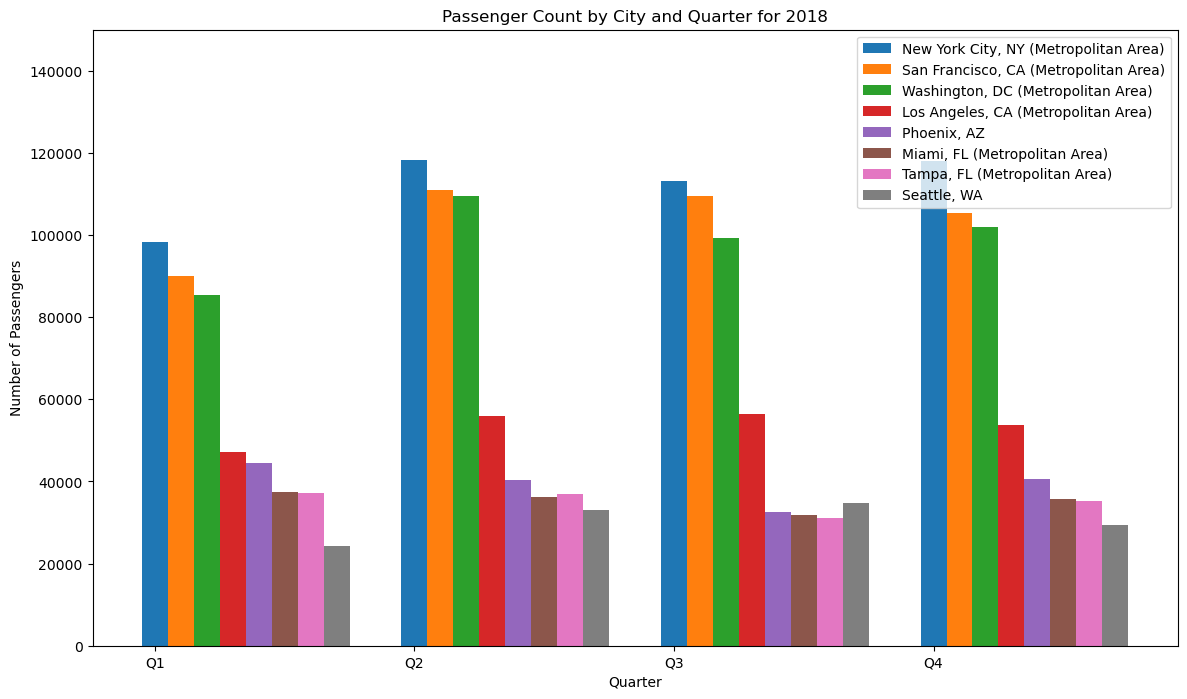

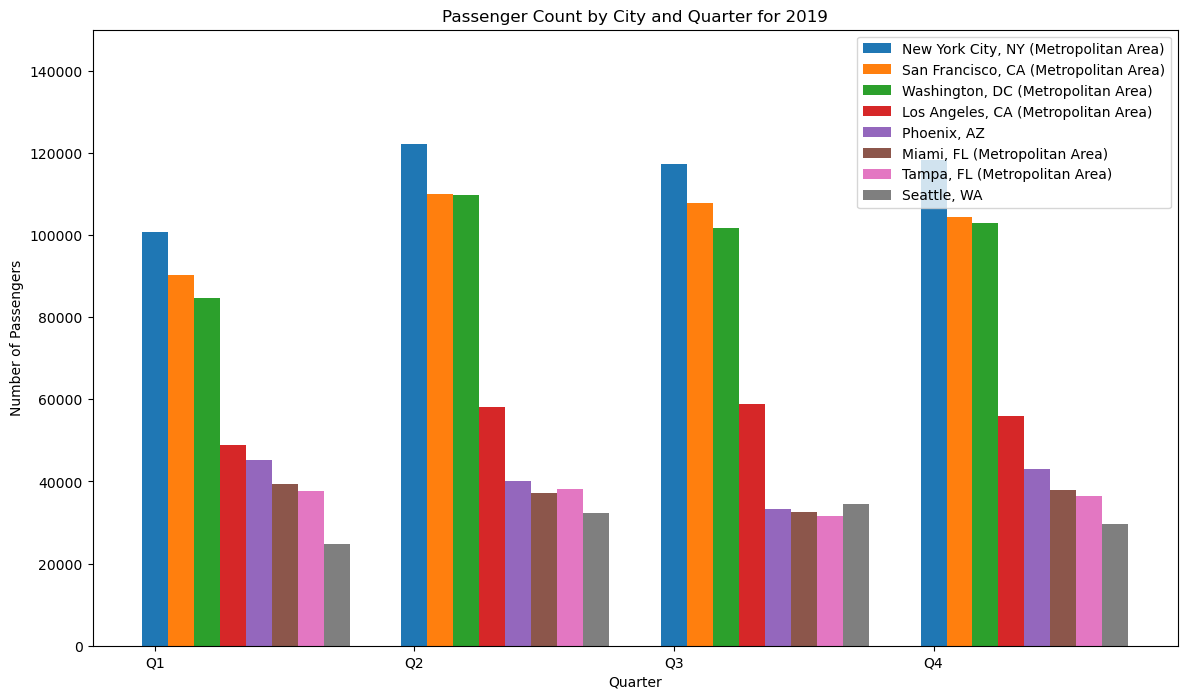

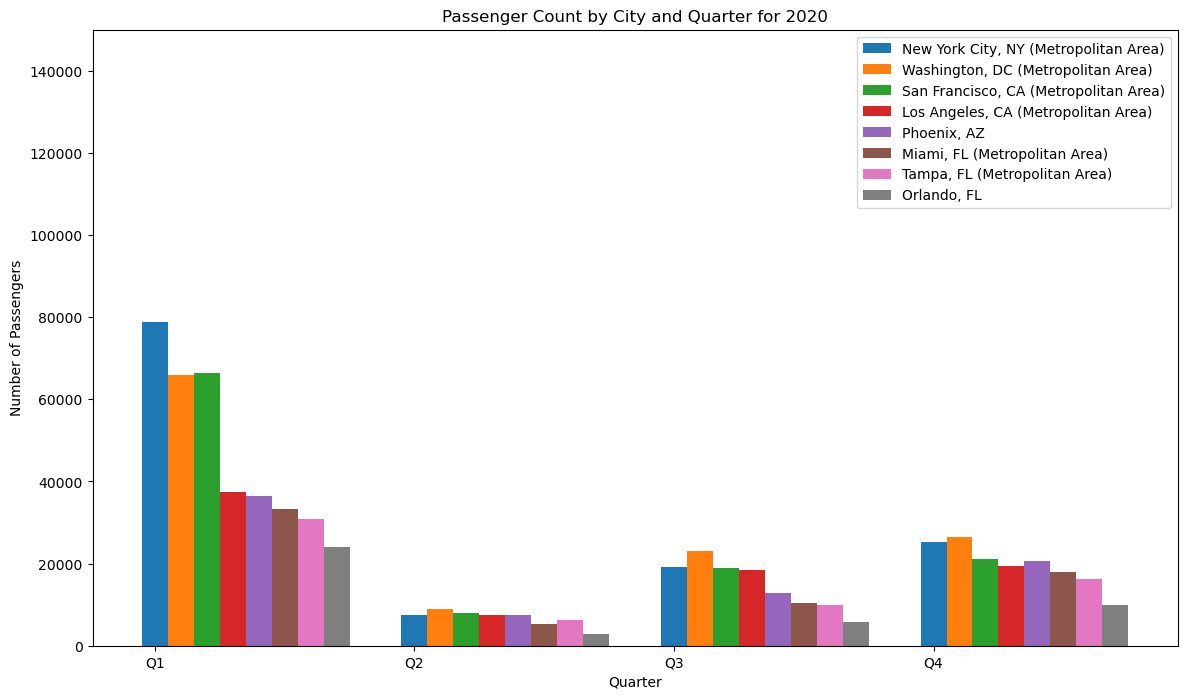

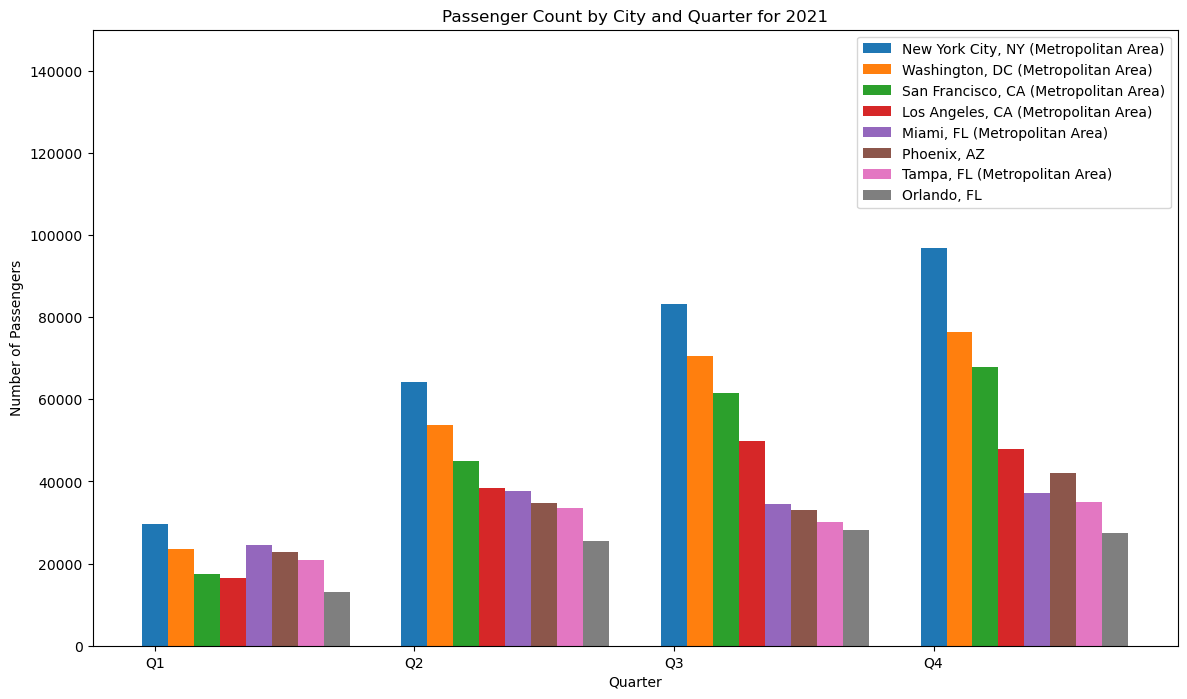

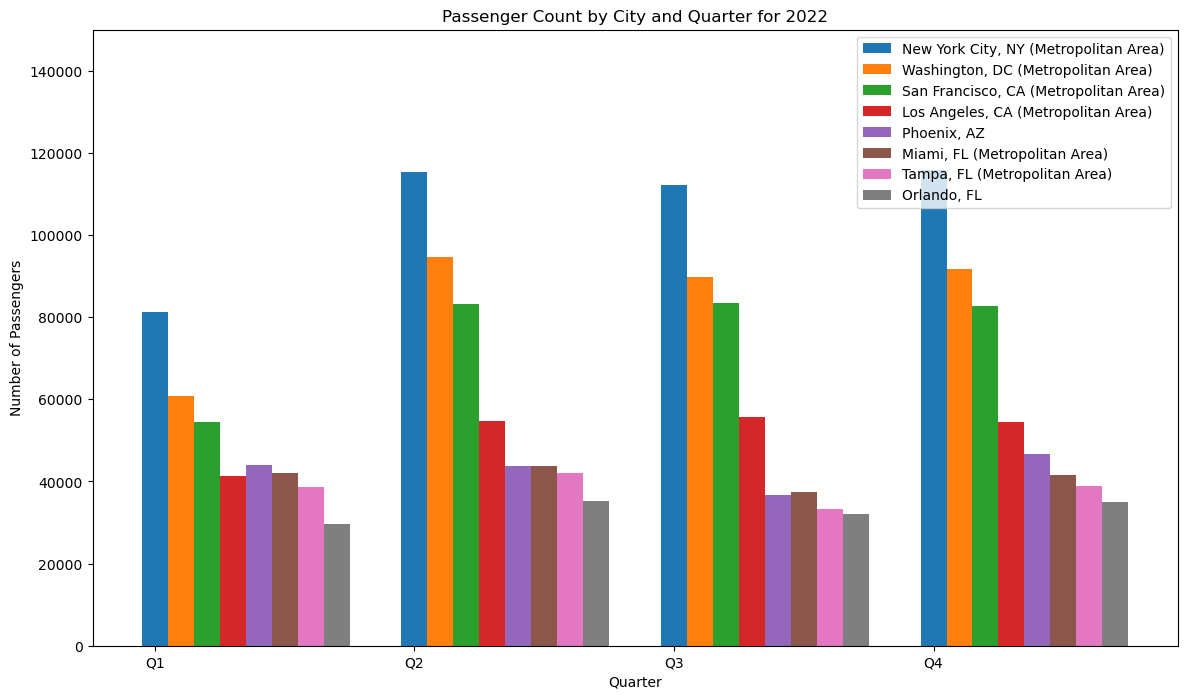

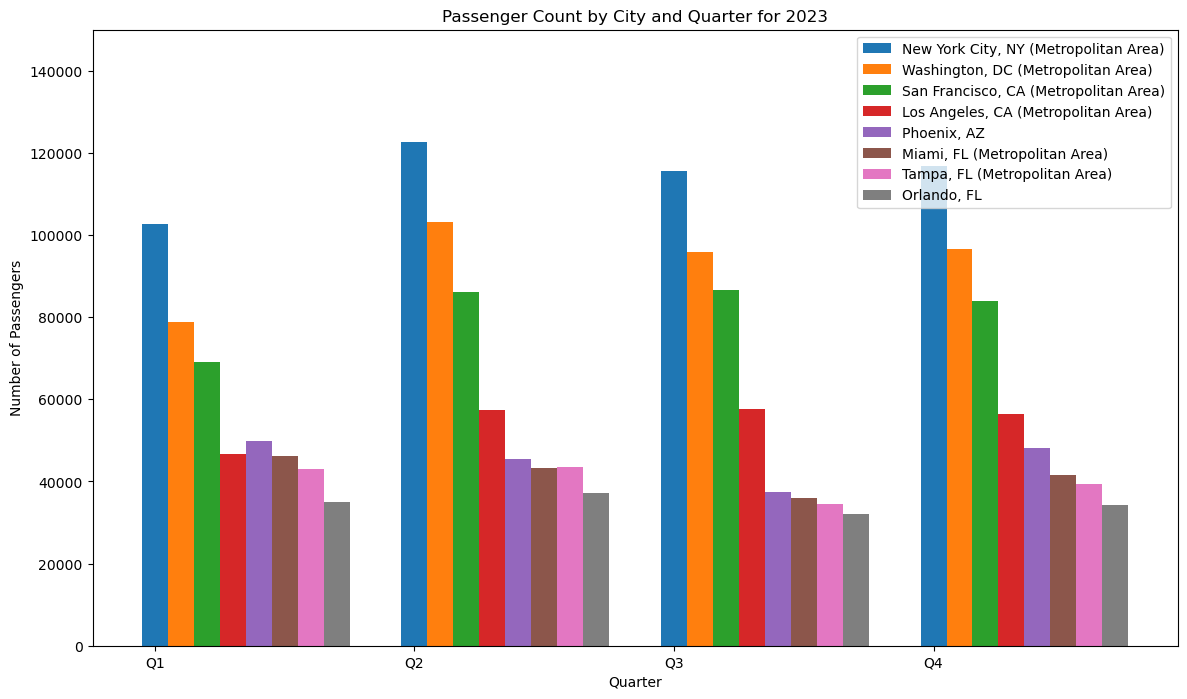

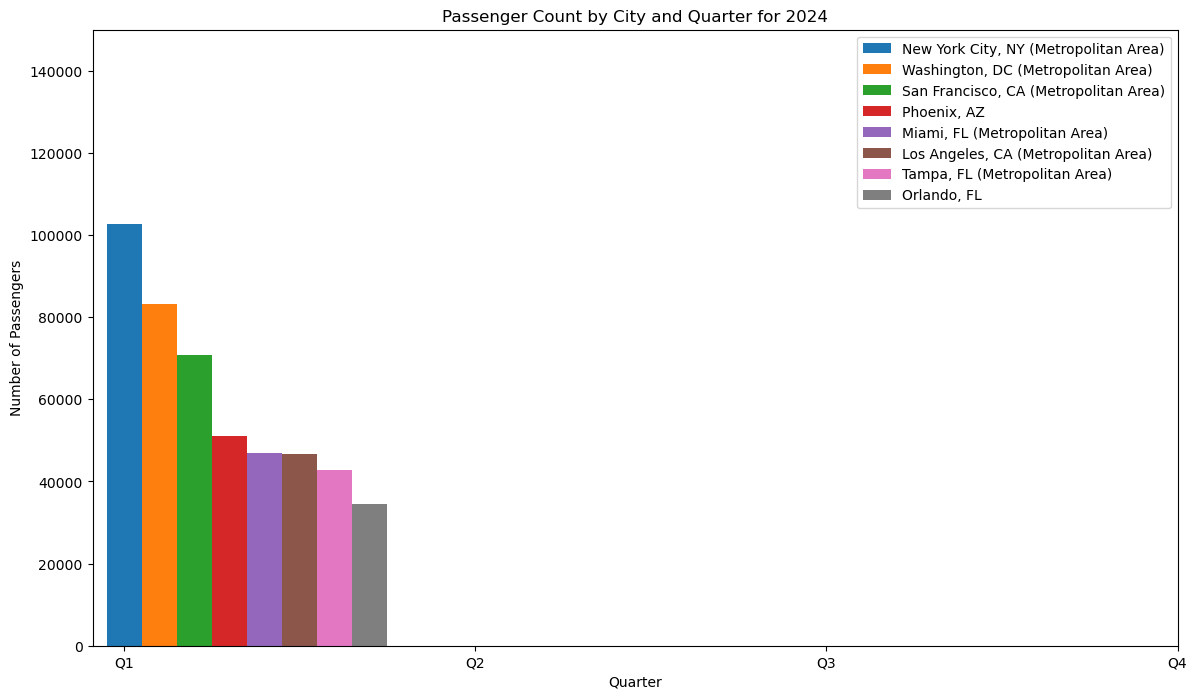

In [4]:
#sorted_df = grouped_df.sort_values(by='passengers', ascending=False)
grouped_df = flights_df.groupby(['city2', 'quarter', 'Year'])['passengers'].sum().reset_index()
# Get the unique years
years = grouped_df['Year'].unique()
years = years[years>1999]
# Calculate the standard deviation for each city and quarter
city_quarter_std_dev = flights_df.groupby(['city2', 'quarter'])['passengers'].std().reset_index()
city_quarter_std_dev = city_quarter_std_dev.rename(columns={'passengers': 'Std_Dev'})

city_quarter_std_dev
# Plotting one graph for each year
for year in years:
    # Filter the data for the current year
    df_year = grouped_df[grouped_df['Year'] == year]
    
    # Find the top 8 cities with the most passengers for the current year
    top_cities = df_year.groupby('city2')['passengers'].sum().nlargest(8).index
    
    # Filter the DataFrame to include only the top 8 cities
    filtered_df = df_year[df_year['city2'].isin(top_cities)]
    
    # Plotting
    plt.figure(figsize=(14, 8))
    for city in top_cities:
        city_data = filtered_df[filtered_df['city2'] == city]
        plt.bar(city_data['quarter'] + (0.1 * list(top_cities).index(city)), 
                city_data['passengers'], 
                width=0.1, 
                label=city)
    
    plt.xlabel('Quarter')
    plt.ylabel('Number of Passengers')
    plt.ylim(top=150000)
    plt.title(f'Passenger Count by City and Quarter for {year}')
    plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
    plt.legend(title='City')
    #plt.legend(loc='upper left', bbox_to_anchor=(0.05, 1))
    plt.legend(loc='upper right')
    
# saving the plot in a png file
    plot_name='flight'+str(year)+".png"
    plt.savefig(plot_name, format='png', dpi=300)
#showing the plot
    plt.show()



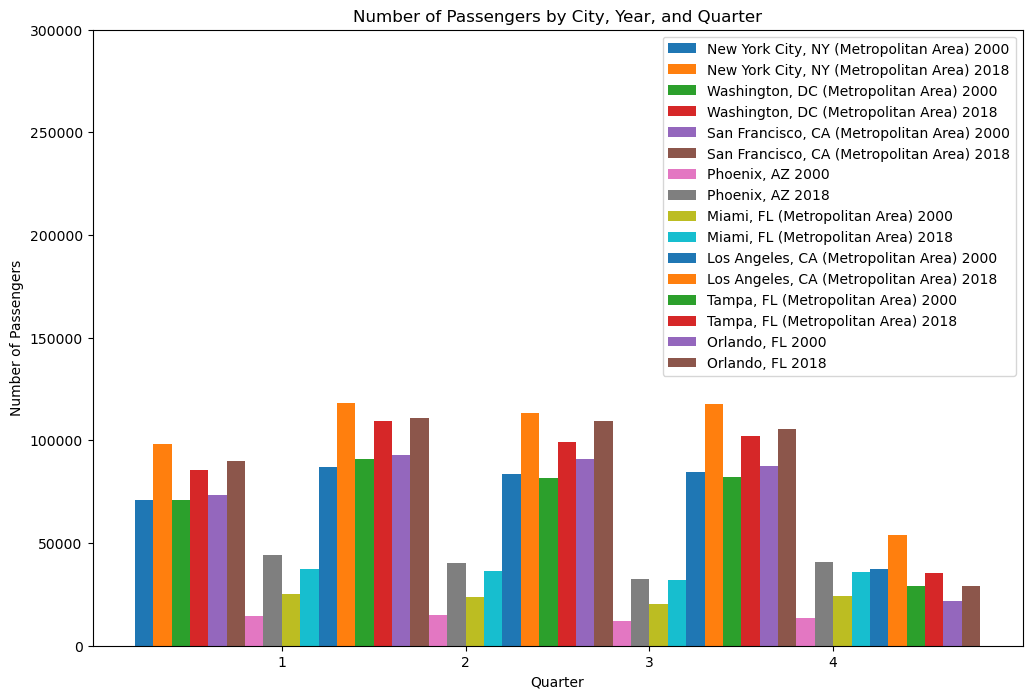

In [5]:
# Get top cities
cities = top_cities 
# Years we are comparing
years = [2000, 2018]  
# Get unique quarters
quarters = grouped_df['quarter'].unique()  

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width of the bars
bar_width = 0.1

# Set positions of the bars on the x-axis
index = np.arange(len(quarters))

# Plot bars for each city and year
for i, (city, year) in enumerate([(c, y) for c in cities for y in years]):
    city_year_data = grouped_df[(grouped_df['city2'] == city) & (grouped_df['Year'] == year)]
    ax.bar(index + i * bar_width, city_year_data['passengers'], bar_width, label=f'{city} {year}')

# Add labels and title
plt.ylim(top=300000)
ax.set_xlabel('Quarter')
ax.set_ylabel('Number of Passengers')
ax.set_title('Number of Passengers by City, Year, and Quarter')
ax.set_xticks(index + bar_width * (len(cities) * len(years) - 1) / 2)
ax.set_xticklabels(quarters)

# Add a legend to distinguish between the cities and years
ax.legend()

# Show the plot
plt.show()